## Breast Cancer Classification using k-Nearest Neighbors (kNN)

In this project, I develop a machine learning model using the k-Nearest Neighbors (kNN) algorithm to classify breast cancer tumor samples as benign or malignant. Using a training datasets, I train the model on labeled training data and evaluate its performance on unseen test data. The goal is to predict the malignancy of tumors and determine how many samples are malignant. Through this process, I experiment with different values of k to optimize classification accuracy and gain insights into the dataset's characteristics. This project demonstrates how machine learning can aid in medical diagnostics by providing an automated approach to tumor classification.

**Section 1 - EDA**

In [5]:
############################################
# Read data
############################################

# File paths for the datasets (with actual file names included)
train_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_train.csv'
test_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_test.csv'
aim_file_path = '/Users/derphantomben/Documents/Coding/Portfolio/Breast Cancer Challenges/Challenge No 1/breastcancer_aim.csv'

# Importing the datasets and treating 'null' strings as NaN values
df_train = pd.read_csv(train_file_path, na_values='null')
df_test = pd.read_csv(test_file_path, na_values='null')
df_aim = pd.read_csv(aim_file_path, na_values='null')

In [6]:
# Exploring number of rows and columns

print(df_train.shape)
print(df_test.shape)
print(df_aim.shape)

print('-----------')

(559, 12)
(70, 12)
(70, 12)
-----------


In [7]:
# Checking for unrealistic or impossible values 

display(df_train.describe())
display(df_test.describe())
display(df_aim.describe())

,Unnamed: 0,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,559.000000,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000,543.000000,559.000000,559.000000,559.000000,559.000000
mean,280.000000,1.074333e+06,4.359571,3.071556,3.175313,2.735242,3.164580,3.528545,3.427549,2.833631,1.554562,0.339893
std,161.513673,6.751451e+05,2.843822,2.981165,2.931970,2.800671,2.182883,3.646084,2.458551,3.034901,1.626442,0.474097
min,1.000000,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,140.500000,8.592570e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,280.000000,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,419.500000,1.235925e+06,6.000000,4.000000,5.000000,3.000000,4.000000,6.000000,5.000000,3.000000,1.000000,1.000000
max,559.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


,Unnamed: 0,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,35.500000,1.045415e+06,4.828571,3.471429,3.371429,3.00000,3.428571,3.614286,3.571429,3.071429,1.600000,0.385714
std,20.351085,2.761948e+05,2.858861,3.291277,3.070058,2.95375,2.350279,3.652646,2.441023,3.227246,1.697398,0.490278
min,1.000000,1.602960e+05,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,18.250000,8.436552e+05,3.000000,1.000000,1.000000,1.00000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,35.500000,1.117660e+06,5.000000,1.000000,2.000000,1.00000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,52.750000,1.237387e+06,6.000000,5.000000,5.000000,4.00000,4.000000,5.750000,5.000000,4.000000,1.000000,1.000000
max,70.000000,1.365328e+06,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


,Unnamed: 0,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,70.000000,7.000000e+01,70.000000,70.000000,70.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,0.0
mean,35.500000,1.077003e+06,4.471429,3.300000,3.30000,3.185714,3.414286,3.600000,3.385714,2.928571,1.857143,NaN
std,20.351085,2.982449e+05,2.535095,3.363702,3.21838,3.177333,2.331218,3.668906,2.298663,3.061313,2.323701,NaN
min,1.000000,6.337500e+04,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,18.250000,1.060068e+06,3.000000,1.000000,1.00000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,NaN
50%,35.500000,1.178066e+06,4.000000,1.000000,1.00000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,NaN
75%,52.750000,1.266644e+06,5.000000,4.000000,5.75000,4.000000,4.000000,7.000000,4.000000,4.000000,1.000000,NaN
max,70.000000,1.368882e+06,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN


In [8]:
print('The sum of Nan in df_train is_:', df_train.isna().sum())
print('-------------------------------')
print('The sum of Nan in df_train is_:', df_test.isna().sum())
print('-------------------------------')
print('The sum of Nan in df_train is_:', df_aim.isna().sum())

The sum of Nan in df_train is_: Unnamed: 0            0
id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64
-------------------------------
The sum of Nan in df_train is_: Unnamed: 0           0
id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64
-------------------------------
The sum of Nan in df_train is_: Unnamed: 0            0
id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli         0
bland_chromatin       0
normal_nucleoli       0
mitoses   

In [11]:
df_train.loc[df_train['bare_nucleoli'].isna(),:]

,Unnamed: 0,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
25,26,61634,5,4,3,1,2,NaN,2,3,1,0
30,31,432809,3,1,3,1,2,NaN,2,1,1,0
88,89,169356,3,1,1,1,2,NaN,3,1,1,0
89,90,1193683,1,1,2,1,3,NaN,1,1,1,0
133,134,1096800,6,6,6,9,6,NaN,7,8,1,0
151,152,704168,4,6,5,6,7,NaN,4,9,1,0
158,159,733639,3,1,1,1,2,NaN,3,1,1,0
174,175,1241232,3,1,4,1,2,NaN,3,1,1,0
176,177,1183246,1,1,1,1,1,NaN,2,1,1,0
204,205,1238464,1,1,1,1,1,NaN,2,1,1,0


In [12]:
print(df_train.info())
print(df_test.info())
print(df_aim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         559 non-null    int64  
 1   id                 559 non-null    int64  
 2   clump_thickness    559 non-null    int64  
 3   size_uniformity    559 non-null    int64  
 4   shape_uniformity   559 non-null    int64  
 5   marginal_adhesion  559 non-null    int64  
 6   epithelial_size    559 non-null    int64  
 7   bare_nucleoli      543 non-null    float64
 8   bland_chromatin    559 non-null    int64  
 9   normal_nucleoli    559 non-null    int64  
 10  mitoses            559 non-null    int64  
 11  class              559 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 52.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------      

In [14]:
# Checking data types and convert to correct format

##################################################
df_train['id'] = df_train['id'].astype('category')
df_test['id'] = df_test['id'].astype('category')
df_aim['id'] = df_aim['id'].astype('category')

##################################################
df_train['class'] = df_train['class'].astype('category')
df_test['class'] = df_test['class'].astype('category')
df_aim['class'] = df_aim['class'].astype('category')

In [15]:
# Checking for unique values of classes in train- and test set (aim_set does not contain classes)

print(df_train['class'].unique())
df_test['class'].unique()

[1, 0]
Categories (2, int64): [0, 1]


[0, 1]
Categories (2, int64): [0, 1]

In [16]:
# Checking distribituon of classes in train- and test dataset 

print(df_test['class'].value_counts())
print(df_train['class'].value_counts())

class
0    43
1    27
Name: count, dtype: int64
class
0    369
1    190
Name: count, dtype: int64


In [17]:
# Checking for missing values and handle them

df_train.dropna(subset=['bare_nucleoli'], inplace = True)
print(df_train.isna().sum())

Unnamed: 0           0
id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64


**Section 2 - Data preparation and model interpretation**

After reading, exploring, and cleaning the data, the data needs to be preparaed for modeling (*Data Preparation*). In the following I will explore whether the columns are correlated with each other and if any individual correlations are problematic for the analysis.

**Note:** Correlation coefficients of $r$ = .1 or less are considered low, $r$ = .3 as moderate, and $r$ = .5 or higher as high.

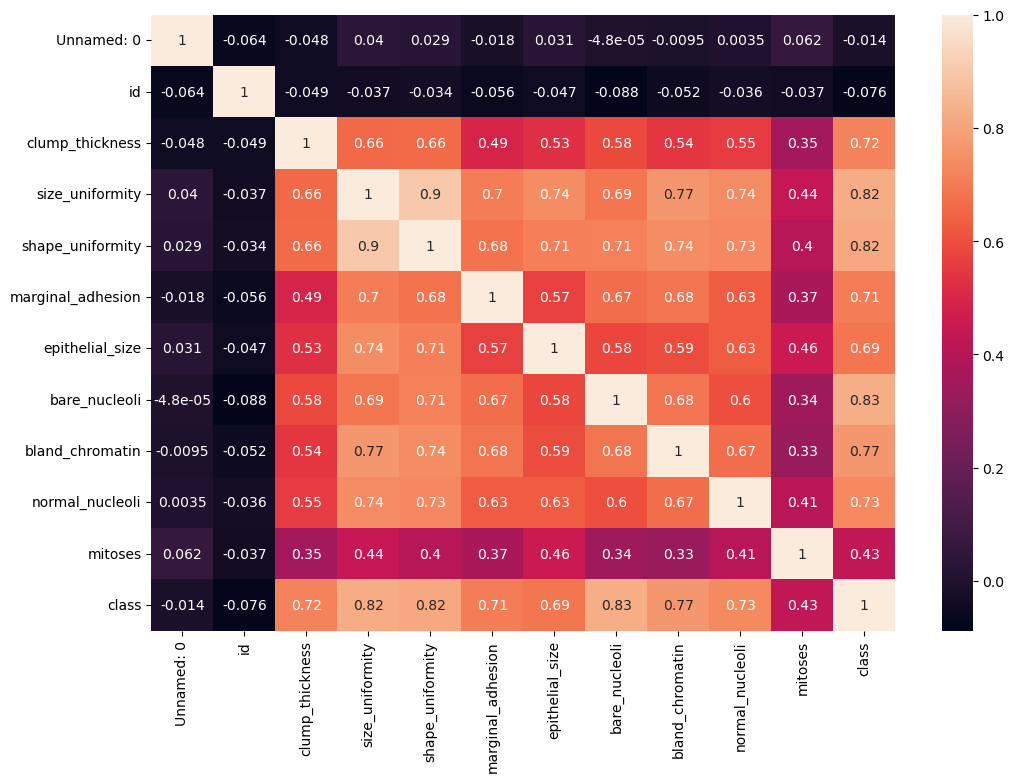

In [19]:
# Checking for intercorrelations in train set
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure (the original output was too small and the annotations not readable.)
plt.figure(figsize=(12, 8))  # Adjust the width and height as per your preference

# Create the heatmap with annotations
sns.heatmap(df_train.corr(), annot=True)

# Show the plot
plt.show()

**My observations:** Only the column 'mitoses' seems to have low correlations with other features. The choice falls on 'bland_chromatin', which has the lowest correlation with the 'mitoses' column.

Now, I create the feature matrix and the target vector for the training and test datasets. I only use the columns 'bland_chromatin' and 'mitoses' as features. The target vector should be 'class'.

For the training dataset, the feature matrix is be named `features_train` and the target vector is be named `target_train`. The features have been standardized to make them comparable to each other. 

In [20]:
# feature matrix and target vector for train set

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train = df_train[['bland_chromatin', 'mitoses']]
target_train = df_train['class']
features_train_standardized = scaler.fit_transform(features_train)

**Further steps:** For the test dataset, the feature matrix will be be named `features_test` and the target vector will be be named `target_test`. The features have been again standardized to make them comparable to each other.

In [22]:
# feature matrix and target vector for test set

features_test = df_test[['bland_chromatin', 'mitoses']]
target_test = df_test['class']
features_test_standardized = scaler.transform(features_test)

**Section 3 - Determining an appropriate k for the number of nearest neighbors for classification.**

After preparing the data, the next steo is teh actual modeling. Our statistical model will be the k-Nearest Neighbors algorithm.

As a reminder - the sequence for modeling with sklearn is:

1) Choose the model type.

2) Instantiate the model with specific hyperparameters.

3) Split the data into a feature matrix and a target vector.

4) Fit the model to the data (model fitting).

5) Make predictions with the trained model.

I will evaluate the performance of the k-Nearest Neighbors algorithm based on the test dataset, for different numbers of nearest neighbors, ranging from one to ten neighbors.

To do this, I will write a for loop that iterates through the number of nearest neighbors. In each iteration, I will instantiate the statistical model (KNeighborsClassifier()) and fit it to the training dataset. Using the trained model, I will predict the target vector based on the standardized features of the test dataset. Then, I will calculate the accuracy (accuracy_score()) for each fitted model and store it in a list.



In [23]:
# Model evaluation with accuracy for k=1 to k=10

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

score_list = []

for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(features_train_standardized, target_train)
    target_test_pred = model.predict(features_test_standardized)
    score_list.append(accuracy_score(target_test, target_test_pred))

In [24]:
score_list

[0.6857142857142857,
 0.8142857142857143,
 0.8142857142857143,
 0.8142857142857143,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571]

**My observation** The score list shows that the k-Nearest Neighbors algorithm improves in performance as the number of neighbors increases, reaching a peak accuracy of 0.8571 at 𝑘=5. After this point, increasing 𝑘 further does not yield better results. This suggests that 𝑘=5
might be the optimal choice for this dataset, as it provides a good balance between underfitting and overfitting.

**Further approach:** Next, I will plot the accuracy values for each k-value from 1 to 10. The accuracy will be represented on the y-axis, and the number of nearest neighbors will be represented on the x-axis.

To visualize the performance of the model for different values of 𝑘, I will create a plot that shows how the accuracy changes as the number of neighbors increases. This will help us understand which k-value leads to the best performance for the k-Nearest Neighbors algorithm.

In the plot, I will display the accuracy scores for each 𝑘 in the range from 1 to 10. The plot will give us an intuitive way to see how the model's accuracy evolves as the number of nearest neighbors changes, helping us select the optimal k-value for our model.

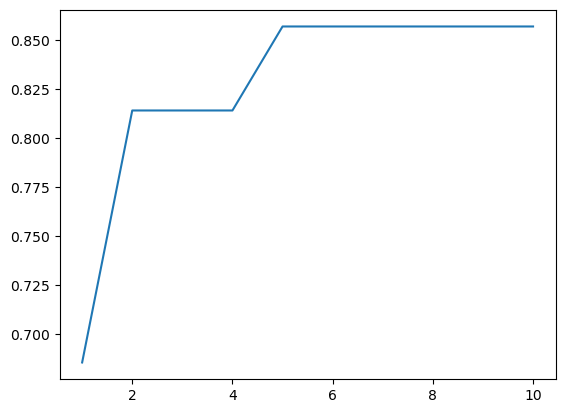

In [25]:
# Plot accuracy scores

import matplotlib.pyplot as plt
plt.plot(range(1, 11), score_list)

**Next step:** Now, I will select the 𝑘-value that achieved the best accuracy and instantiate my model again. I will then create a confusion matrix (confusion_matrix()), which will show  the number of true positives, false positives, true negatives, and false negatives in the test dataset.

In [26]:
# Choosing k with best accuracy among k=1 and k=10 and plot confusion matrix for test dataset

from sklearn.metrics import confusion_matrix

k=4
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(features_train_standardized, target_train)
target_test_pred = model_knn.predict(features_test_standardized)
display(confusion_matrix(target_test, target_test_pred))

array([[39,  4],
       [ 9, 18]])

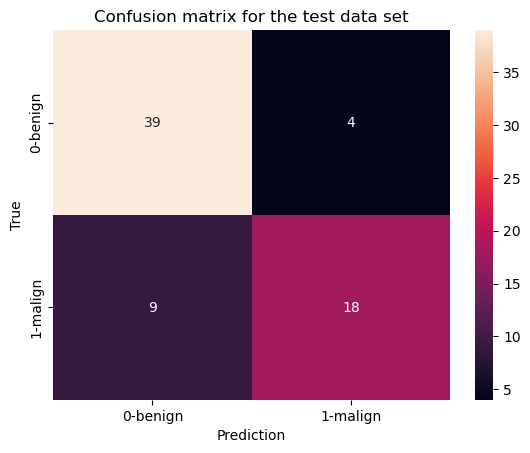

In [27]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(target_test, target_test_pred), annot=True, ax=ax);
ax.set_xlabel('Prediction');
ax.set_ylabel('True');
ax.xaxis.set_ticklabels(['0-benign', '1-malign']);
ax.yaxis.set_ticklabels(['0-benign', '1-malign']);
ax.set_title('Confusion matrix for the test data set');

In [28]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

perf_measure(target_test, target_test_pred)

(18, 4, 39, 9)

**Based on the confusion matrix values you provided from the perf_measure function:**

True Positives (TP) = 18: These are the cases where the model correctly predicted a malignant tumor (positive class).

False Positives (FP) = 4: These are the cases where the model incorrectly predicted a malignant tumor, but it was actually benign.

True Negatives (TN) = 39: These are the cases where the model correctly predicted a benign tumor (negative class).

False Negatives (FN) = 9: These are the cases where the model incorrectly predicted a benign tumor, but it was actually malignant.

In [29]:
# Testing how well the model performs 

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming target_test is the true values and target_test_pred is the predicted values
TP, FP, TN, FN = perf_measure(target_test, target_test_pred)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)

# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Avoid division by zero

# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Avoid division by zero

# Calculate F1 Score
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0  # Avoid division by zero

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.8143
Precision: 0.8182
Recall: 0.6667
F1-Score: 0.7347


**My observations:**
The model seems to perform reasonably well with an accuracy of about 81.43%.

The precision (81.8%) is good, indicating that when the model predicts a malignant tumor, it's mostly correct.

The recall (66.67%) is somewhat lower, meaning the model misses a fair number of malignant tumors (false negatives).

The F1-score of 73.3% indicates a good balance between precision and recall but suggests that there is room for improvement, particularly in reducing false negatives

**Section 4 - Classifying cancer cells as benign or malign**

My algorithm is now trained and should be used to predict the benign or malignant nature of cancer cells in the samples to be classified in the target dataset.

Now, I will create the feature matrix for the target dataset and store it in features_aim. The features will be the columns 'bland_chromatin' and 'mitoses'. The target vector is not available here because the 'class' column contains only NaN values, meaning the actual target values are unknown.

I will also make sure to standardize the features and store them in features_aim_standardized. Using the trained model, I will predict the target values—whether the cancer cells are benign or malignant—based on features_aim_standardized. I will then save these predictions in target_aim_pred and add my predictions as a new column named 'class_pred' at the end of df_aim. Finally, I will display the first 5 rows of df_aim to verify the result.

In [31]:
# feature matrix and prediction of target vector for df_aim 

features_aim = df_aim[['bland_chromatin', 'mitoses']]
features_aim_standardized = scaler.transform(features_aim)
target_aim_pred = model_knn.predict(features_aim_standardized)
df_aim['class_pred'] = target_aim_pred

df_aim.head()

,Unnamed: 0,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,class_pred
0,1,1347943,5,2,2,2,2,1,1,1,2,NaN,1
1,2,1148278,3,3,6,4,5,8,4,4,1,NaN,1
2,3,706426,5,5,5,2,5,10,4,3,1,NaN,1
3,4,1075123,3,1,2,1,2,1,2,1,1,NaN,0
4,5,1183240,4,1,2,1,2,1,2,1,1,NaN,0


**Next step** I will now filter all the predictions that forecast a malignant breast cancer (malignant = 1). After filtering, I will determine the number of these samples in the target dataset.

In [32]:
# Creatingf a mask for malignant tumor cells in df_aim

mask_mali = df_aim['class_pred'] == 1
len(df_aim.loc[mask_mali,:])

25